# Principal Component Analysis of the whole data set

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline


In [54]:
# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [55]:
combined_stats = pd.read_csv('../notebooks/correlation_files/combined_stats.csv')

In [56]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_stats_scaled = scaler.fit_transform(combined_stats)

In [57]:
pca = PCA()
pca.fit(combined_stats_scaled)

explained_variance = pca.explained_variance_ratio_

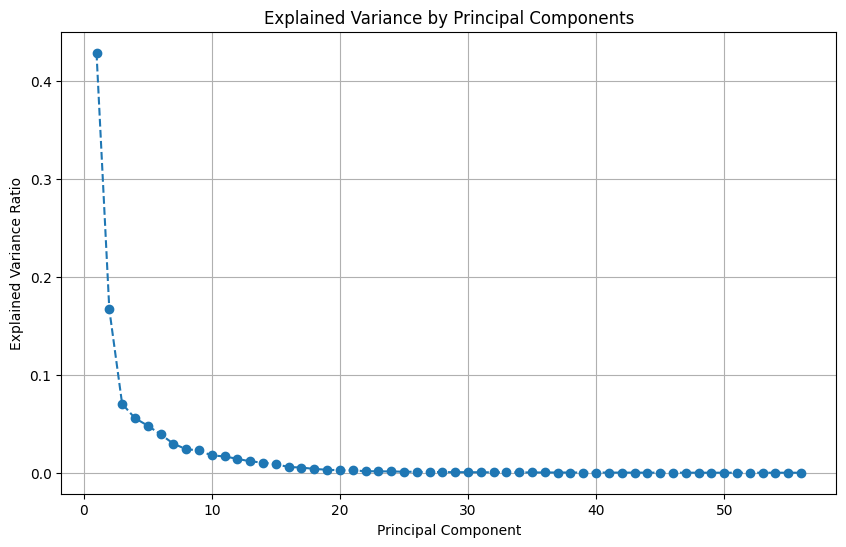

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [59]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
magic_n_components = np.argmax(cumulative_variance >= 0.9) + 1

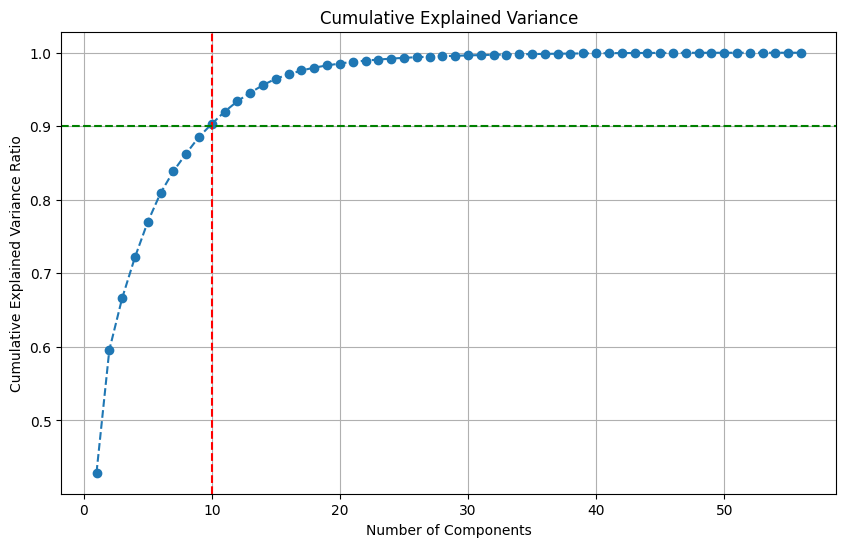

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axvline(x=magic_n_components, color='r', linestyle='--')  # Line at 95%
plt.axhline(y=0.90, color='g', linestyle='--')  # Line at 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [61]:
# Choose the number of components (for example, 8)
n_components = 10
pca = PCA(n_components=n_components)
combined_stats_pca = pca.fit_transform(combined_stats_scaled)

# Create a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components)]
combined_stats_pca_df = pd.DataFrame(data=combined_stats_pca, columns=pca_columns)

# Display the PCA results
combined_stats_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-9.768554,-2.045840,-6.326403,11.147059,-6.809663,-2.752086,7.449963,-2.347898,19.804196,5.134821
1,-7.455101,-2.205319,1.116549,-1.979740,-4.187881,-4.541195,2.328395,-4.546013,0.080739,-2.535141
2,-6.639835,-2.035914,2.007098,-2.225618,-2.984256,-3.739794,2.074620,-3.520082,-0.509309,-1.785895
3,-6.177145,-1.652456,2.738629,-0.765918,-1.913773,-3.915885,1.889767,-3.415457,-1.271564,-1.347875
4,-6.074565,-1.536758,3.049386,8.271487,-0.149433,-3.961666,3.363969,-1.612074,-3.023578,-0.524224


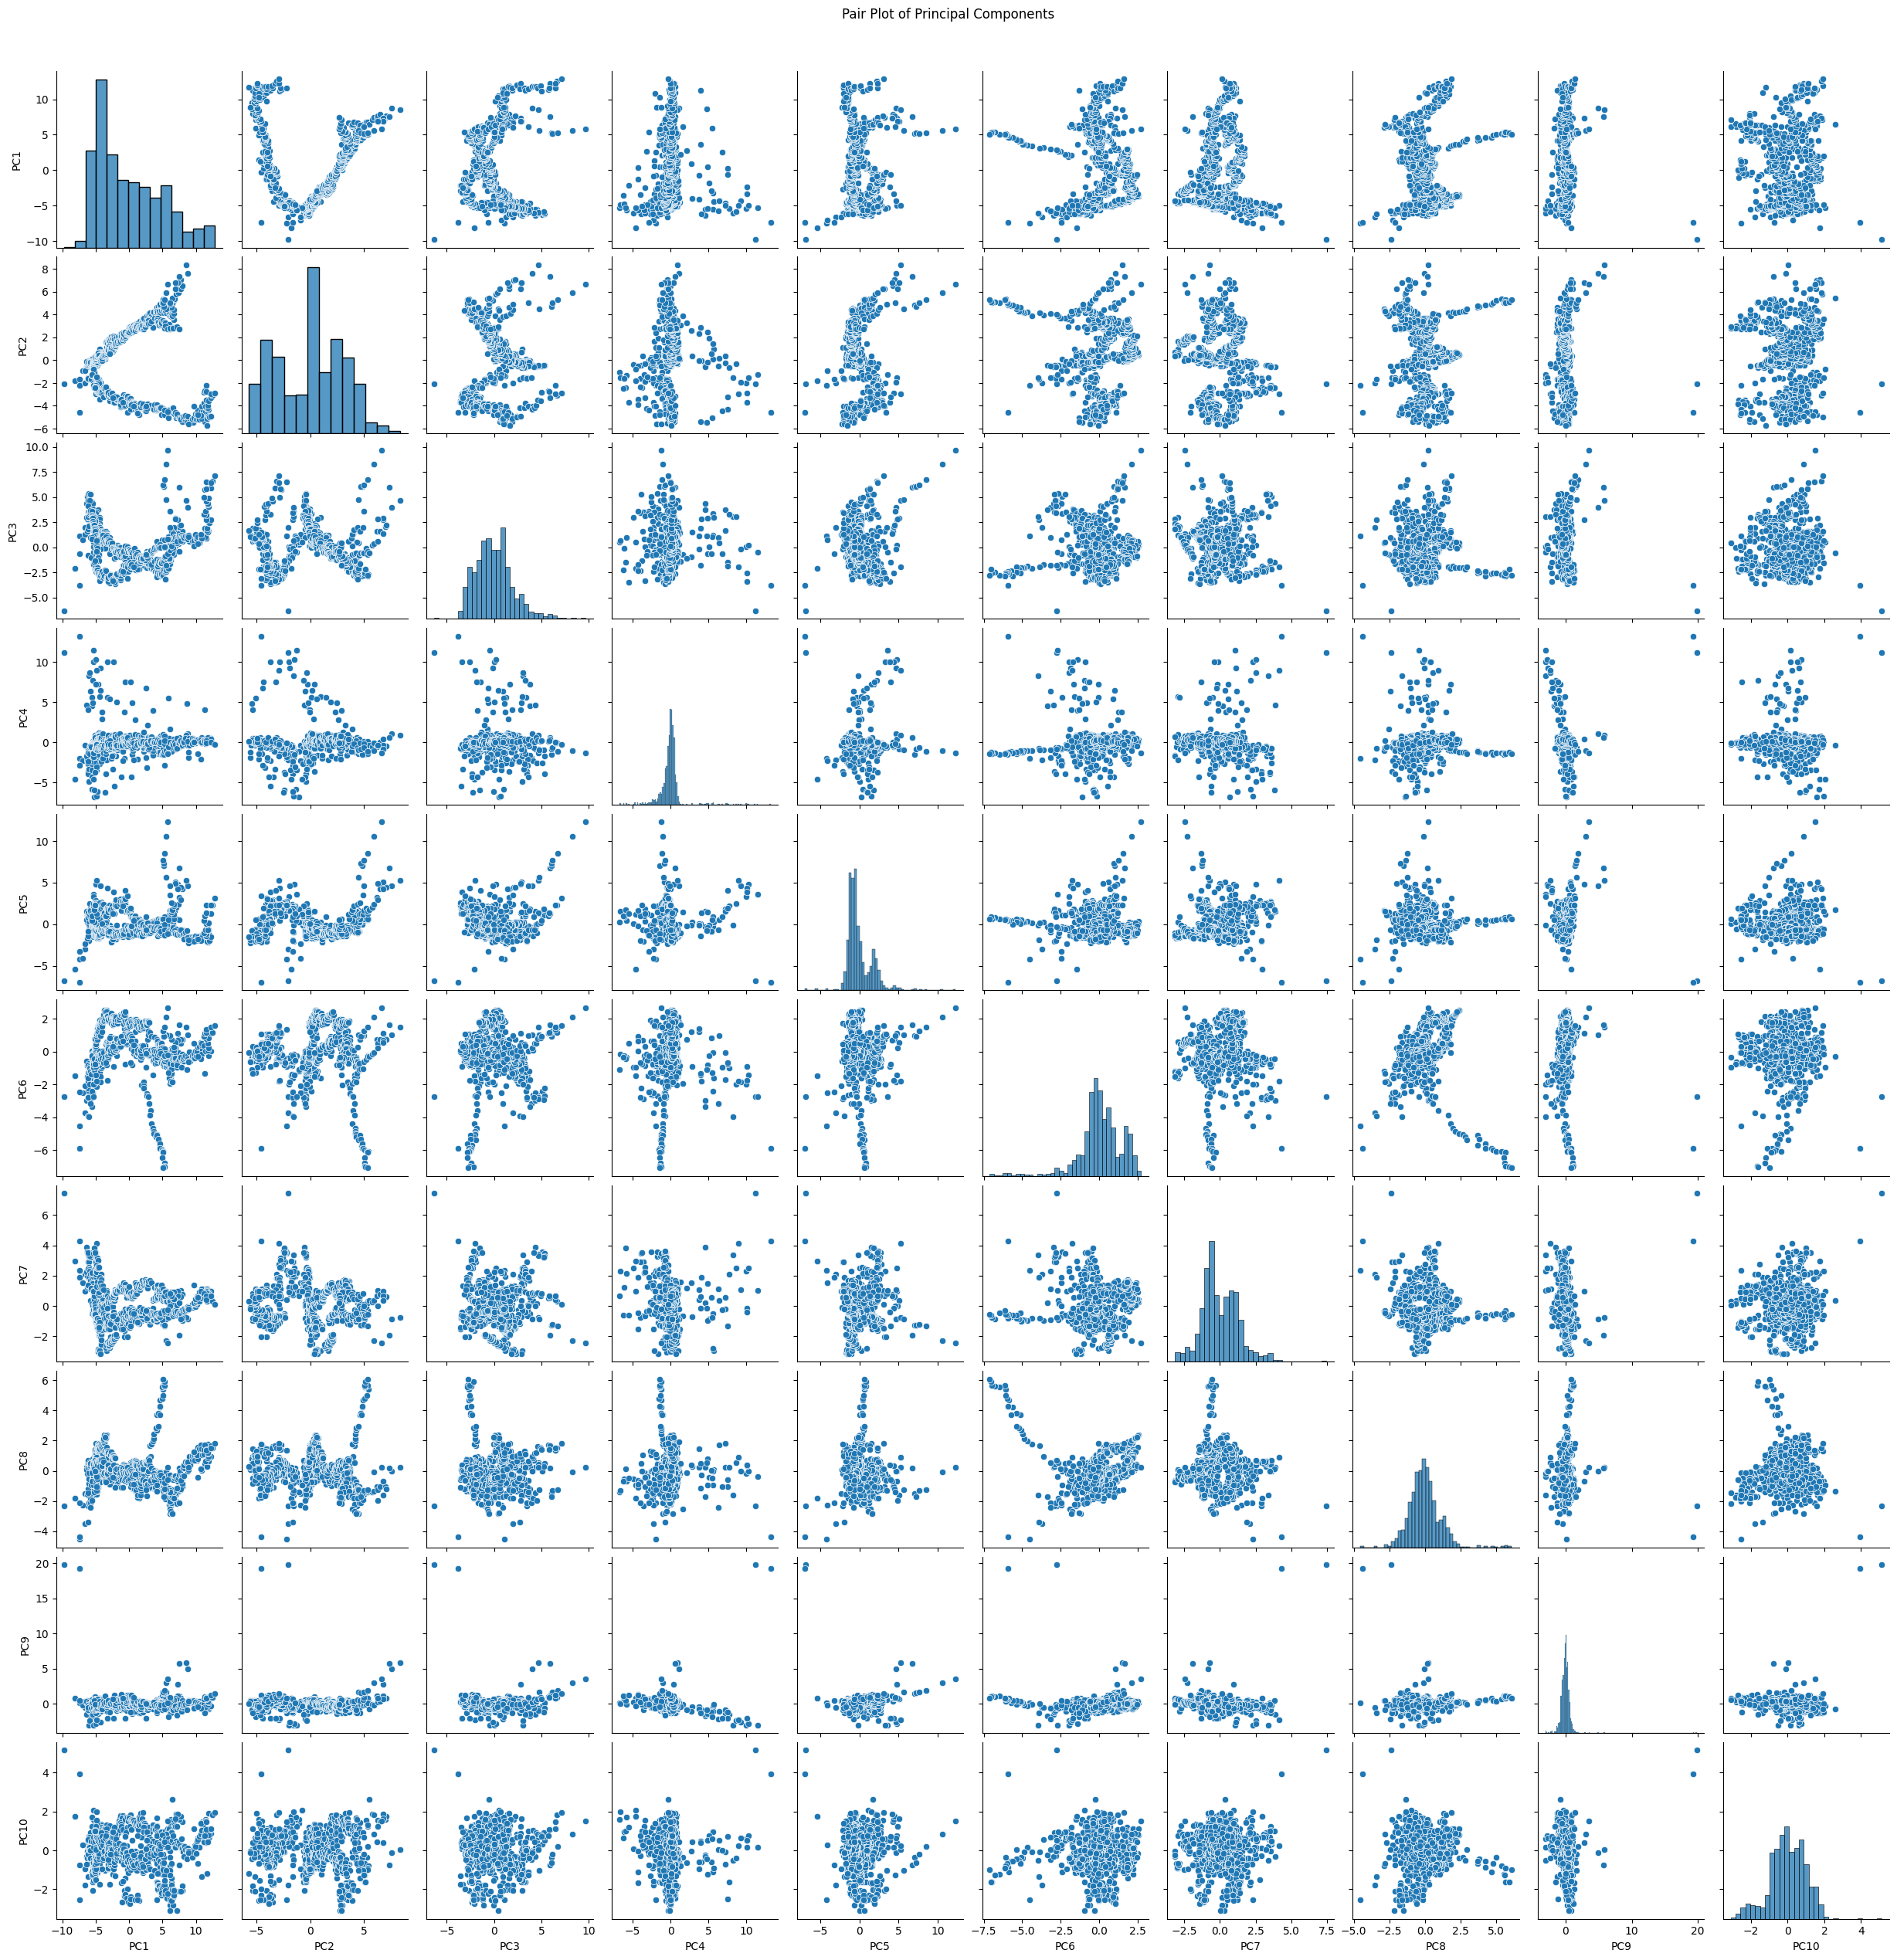

In [62]:
sns.pairplot(combined_stats_pca_df)
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.show()

In [63]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=combined_stats.columns)

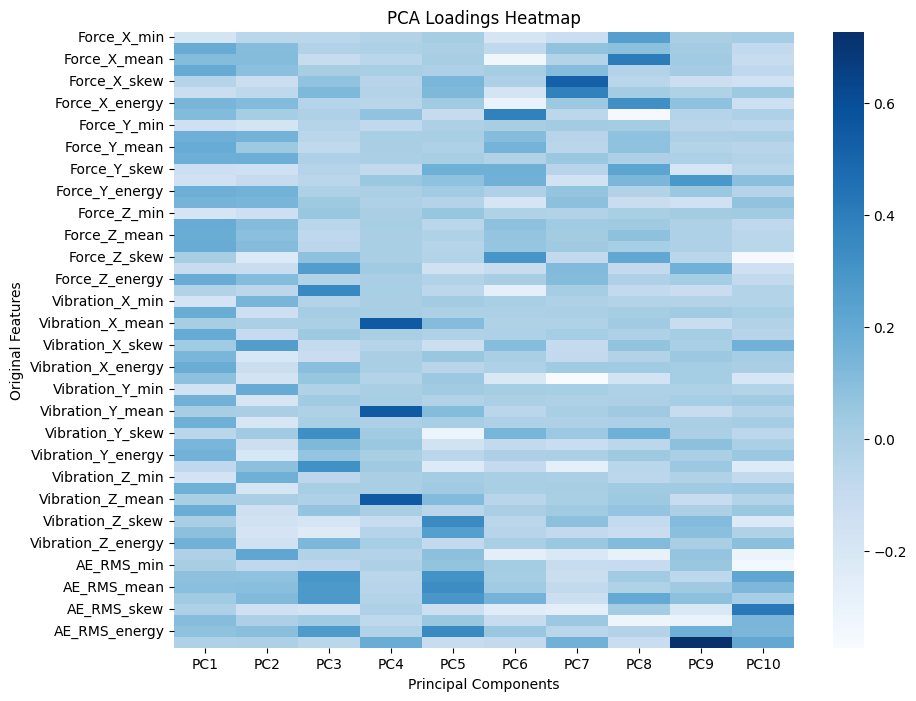

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='Blues', annot=False, fmt='.2f')
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

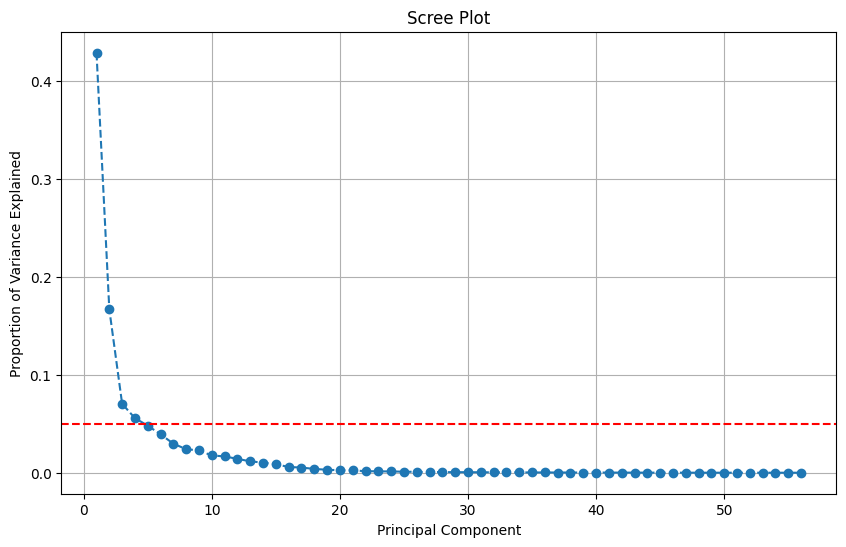

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.axhline(y=0.05, color='r', linestyle='--')
plt.show()

In [66]:
pc_index = 9
pc_loadings = pca.components_[pc_index]

loadings_df = pd.DataFrame({
    'Feature': combined_stats.columns,
    'Loading': pc_loadings
})

top_features = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index).head(10)

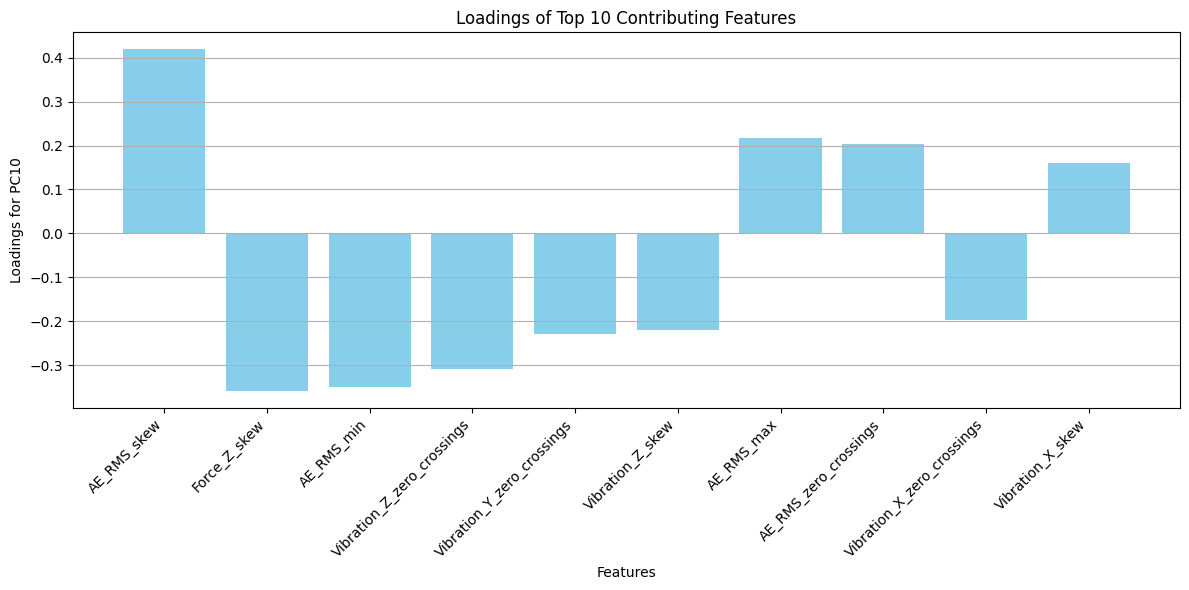

In [67]:
plt.figure(figsize=(12, 6))
plt.bar(x=top_features['Feature'], height=top_features['Loading'], color='skyblue')
plt.xlabel('Features')
plt.ylabel(f'Loadings for PC{pc_index + 1}')
plt.title(f'Loadings of Top {pc_index + 1} Contributing Features')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()